# DATAPRE Technical Report #

By Alon-alon, Cheng, Dela Cruz, Dizon, Evangelista

Sirs comment on our dataset:
<br>
Top Choice - If data will be coming from Kaggle, make sure you highlight how you applied preprocessing. Since data might be clean already, focus on feature engineering and descriptive analysis. Would also encourage the team to find a way to merge the analysis with other data sources if possible. Be creative with how you present the data and make sure that the question youre answering is clear. Suggestion on how you can answer the question in your top choice, check out ANOVA, regression, correlation and t tests :D Goodluck!!!

This technical report will explore the laptop market in order to get insights on its current state. Several questions will be tackled by tihs report: 
<br><br>
What are the common factors found among the current laptops in the market?
<br>
What are the common factors among the most sold laptops?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In order to explore the common factors ... two laptop datasets were found

laptops_1.csv: https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list by Santosh Kumar
<br>
laptops_2.csv: https://www.kaggle.com/datasets/ionaskel/laptop-prices by Ionas Kelepouris   
<br>

## Convert the .csv files into dataframes ##

In [2]:
df_laptops1 = pd.read_csv("datasets/laptops_1.csv")

In [3]:
df_laptops1

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In [4]:
df_laptops2 = pd.read_csv("datasets/laptops_2.csv")

In [5]:
df_laptops2.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The first task is to merge the two laptop datasets together into one. But after loading the two different laptop datasets, it was noticed that they did not have exactly the same columns. There are some columns that are similar but named differently. But there are also some columns that exist in one dataset but not in the other.

With this in mind, it is needed to make the column names of the table uniform and decide which columns would be worth keeping for the new combined dataset.

## Columns of each laptop dataset ##

In [6]:
print("Columns of laptop dataset 1")
print(df_laptops1.columns)

Columns of laptop dataset 1
Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')


In [7]:
print("Columns of laptop dataset 2")
print(df_laptops2.columns)

Columns of laptop dataset 2
Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


The columns of the new laptop dataset are to be 

In [8]:
new_columns = ['brand', 'model', 'processor', 'ram', 'memory', 'os', 'display_size', 'price', 'star_rating', 'ratings']
df_laptops = pd.DataFrame(columns=new_columns)
df_laptops

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings


Each laptop dataset must first be cleaned in order for it to fit cohesively into this new dataset

# Initial dataset cleaning #

## Cleaning laptop dataset 1 ##

The first laptop dataset to be cleaned is currently stored in df_laptops1

In [9]:
df_laptops1

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In the new dataset, processor_brand and processor_name is combined into one column

In [10]:
df_laptops1['processor'] = df_laptops1['processor_brand'] + ' ' + df_laptops1['processor_name']
df_laptops1['processor']

0       AMD A6-9225 Processor
1                AMD APU Dual
2                AMD APU Dual
3                AMD APU Dual
4                AMD APU Dual
                ...          
891               AMD Ryzen 9
892               AMD Ryzen 9
893               AMD Ryzen 9
894    Qualcomm Snapdragon 7c
895               AMD Ryzen 5
Name: processor, Length: 896, dtype: object

The ram column was also noticed to be incorrectly formatted, with GB being mentioned twice for all rows

In [11]:
df_laptops1['ram_gb']

0      4 GB GB
1      4 GB GB
2      4 GB GB
3      4 GB GB
4      4 GB GB
        ...   
891    4 GB GB
892    4 GB GB
893    4 GB GB
894    4 GB GB
895    8 GB GB
Name: ram_gb, Length: 896, dtype: object

By splitting each value in the ram column and keeping the first two words, the format would now be aligned with the second dataset

In [12]:
df_laptops1['ram'] = df_laptops1['ram_gb'].apply(lambda x: x.split()[0] + x.split()[1])
df_laptops1['ram']

0      4GB
1      4GB
2      4GB
3      4GB
4      4GB
      ... 
891    4GB
892    4GB
893    4GB
894    4GB
895    8GB
Name: ram, Length: 896, dtype: object

ssd and hdd columns will also be combined into a column named memory

In [13]:
df_laptops1.loc[df_laptops1['hdd'] == '0 GB', ['memory']] = df_laptops1['ssd'] + ' SSD'
df_laptops1.loc[df_laptops1['ssd'] == '0 GB', ['memory']] = df_laptops1['hdd'] + ' HDD'
df_laptops1.loc[(df_laptops1['ssd'] != '0 GB') & (df_laptops1['hdd'] != '0 GB'), ['memory']] = df_laptops1['ssd'] + ' SSD + ' + df_laptops1['hdd'] + ' HDD'

In [14]:
df_laptops1['memory'] = df_laptops1['memory'].str.replace(' GB', 'GB')

In [15]:
df_laptops1.memory.value_counts()

512GB SSD                 412
256GB SSD                 128
1024GB SSD                111
1024GB HDD                 87
256GB SSD + 1024GB HDD     73
512GB HDD                  63
128GB SSD                  11
512GB SSD + 1024GB HDD      3
2048GB SSD                  2
512GB SSD + 512GB HDD       2
3072GB SSD                  1
128GB SSD + 1024GB HDD      1
32GB SSD                    1
2048GB HDD                  1
Name: memory, dtype: int64

As the laptop dataset 1 has two price columns (old price and latest price), only the latest price will be kept as this report tries to explore the current state of the laptop market

In [16]:
df_laptops1['price'] = df_laptops1['latest_price']

Also, it was noticed that the currency of the two laptop datasets are different. So in order to make it uniform the currency is to be converted in to USD.

For laptop dataset 1, the prices are in Indian Rupee (INR).

In [17]:
INR_to_USD = 0.013
df_laptops1['price'] = df_laptops1['price'] * INR_to_USD

## Append the cleaned laptop 1 columns to the new dataframe ##

In [18]:
df_laptops1_cols = df_laptops1[['brand', 'model', 'processor', 'ram', 'memory', 'os',
                                'display_size', 'price', 'star_rating', 'ratings']]

df_laptops = df_laptops.append(df_laptops1_cols)
df_laptops

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings
0,Lenovo,A6-9225,AMD A6-9225 Processor,4GB,1024GB HDD,Windows,Missing,324.87,3.7,63
1,Lenovo,Ideapad,AMD APU Dual,4GB,512GB HDD,Windows,Missing,254.67,3.6,1894
2,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,259.87,3.7,1153
3,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,279.37,3.7,1153
4,Avita,PURA,AMD APU Dual,4GB,256GB SSD,Windows,Missing,324.87,3.7,1657
...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1884.87,0.0,0
892,ASUS,Ryzen,AMD Ryzen 9,4GB,1024GB SSD,Windows,Missing,1949.87,0.0,0
893,ASUS,Ryzen,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1858.87,0.0,0
894,SAMSUNG,Galaxy,Qualcomm Snapdragon 7c,4GB,512GB HDD,Windows,Missing,506.87,0.0,0


## Cleaning laptop dataset 2 ##

The second laptop dataset to be cleaned is stored in df_laptops2

In [19]:
df_laptops2

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


Firstly, the columns should be renamed in order to be the same with the new dataset

In [20]:
df_laptops2.rename(columns = {'Company':'brand', 'Product':'model', 'Inches':'display_size', 'Cpu':'processor',
                              'Price_euros':'price', 'OpSys':'os', 'Ram':'ram', 'Memory':'memory'}, inplace = True)

It was noticed that in the memory column, there were many excess spaces so this had to be fixed

In [21]:
df_laptops2['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
128GB HDD                          1
5

In [22]:
df_laptops2['memory'] = df_laptops2['memory'].apply(lambda x: ' '.join(x.split()))

In [23]:
df_laptops2['memory'].value_counts()

256GB SSD                       412
1TB HDD                         223
500GB HDD                       132
512GB SSD                       118
128GB SSD + 1TB HDD              94
128GB SSD                        76
256GB SSD + 1TB HDD              73
32GB Flash Storage               38
2TB HDD                          16
64GB Flash Storage               15
512GB SSD + 1TB HDD              14
1TB SSD                          14
256GB SSD + 2TB HDD              10
1.0TB Hybrid                      9
256GB Flash Storage               8
16GB Flash Storage                7
32GB SSD                          6
180GB SSD                         5
128GB Flash Storage               4
512GB SSD + 2TB HDD               3
16GB SSD                          3
256GB SSD + 256GB SSD             2
512GB Flash Storage               2
128GB SSD + 2TB HDD               2
1TB SSD + 1TB HDD                 2
256GB SSD + 500GB HDD             2
128GB HDD                         1
512GB SSD + 256GB SSD       

Just like with the prior dataset, the price column must be converted in the a uniform currency for the new dataset (USD).

For laptop dataset 2, the prices are in euro.

In [24]:
EUR_to_USD = 1.06
df_laptops2['price'] = df_laptops2['price'] * EUR_to_USD

The new dataset will also contain the ratings and star_rating column, however as this laptop dataset does not originally contain this, values will be initially set to zero

In [25]:
df_laptops2['star_rating'] = 0.0
df_laptops2['ratings'] = 0

## Append the cleaned laptop 2 columns to the new dataframe ##

In [26]:
df_laptops2_cols = df_laptops2[['brand', 'model', 'processor', 'ram', 'memory', 'os',
                                'display_size', 'price', 'star_rating', 'ratings']]

df_laptops = df_laptops.append(df_laptops2_cols)
df_laptops

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings
0,Lenovo,A6-9225,AMD A6-9225 Processor,4GB,1024GB HDD,Windows,Missing,324.87,3.7,63
1,Lenovo,Ideapad,AMD APU Dual,4GB,512GB HDD,Windows,Missing,254.67,3.6,1894
2,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,259.87,3.7,1153
3,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,279.37,3.7,1153
4,Avita,PURA,AMD APU Dual,4GB,256GB SSD,Windows,Missing,324.87,3.7,1657
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,14.0,676.28,0.0,0
1299,Lenovo,Yoga 900-13ISK,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,13.3,1588.94,0.0,0
1300,Lenovo,IdeaPad 100S-14IBR,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,14.0,242.74,0.0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,15.6,809.84,0.0,0


## Now the two datasets have been combined! ##

With a new total of 2199 rows, coming from 896 records in the first dataset and 1303 records in the second dataset

In [27]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         2199 non-null   object 
 1   model         2199 non-null   object 
 2   processor     2199 non-null   object 
 3   ram           2199 non-null   object 
 4   memory        2199 non-null   object 
 5   os            2199 non-null   object 
 6   display_size  2199 non-null   object 
 7   price         2199 non-null   float64
 8   star_rating   2199 non-null   float64
 9   ratings       2199 non-null   object 
dtypes: float64(2), object(8)
memory usage: 189.0+ KB


## More cleaning ... ##

Todo: double check for inconsistent data

In [28]:
df_laptops.brand.value_counts()

Lenovo       445
HP           416
Dell         297
ASUS         254
Asus         158
DELL         154
MSI          106
Acer         103
acer          58
Toshiba       48
APPLE         28
Apple         21
Avita         18
Samsung        9
LG             8
Razer          7
Mediacom       7
Microsoft      6
Vaio           5
Nokia          4
Xiaomi         4
Infinix        4
ALIENWARE      4
realme         4
Vero           4
Fujitsu        3
Smartron       3
Google         3
lenovo         3
MICROSOFT      3
Chuwi          3
RedmiBook      3
Mi             2
Huawei         2
SAMSUNG        1
iball          1
Name: brand, dtype: int64

As you can see, there are duplicate entries such as "DELL" - "Dell"  or "APPLE" - "Apple".

A simple fix would be to turn these all to lower case in order to make the data uniform, and then proceed to capitalize the first letter as most brands capitalize the first letter in their brand.



In [29]:
df_laptops['brand'] = df_laptops['brand'].str.lower()
df_laptops['brand'] = df_laptops['brand'].str.title()

All the brands are now uniformed for any further data processing

In [30]:
df_laptops.brand.value_counts()

Dell         451
Lenovo       448
Hp           416
Asus         412
Acer         161
Msi          106
Apple         49
Toshiba       48
Avita         18
Samsung       10
Microsoft      9
Lg             8
Razer          7
Mediacom       7
Vaio           5
Alienware      4
Infinix        4
Xiaomi         4
Vero           4
Realme         4
Nokia          4
Fujitsu        3
Redmibook      3
Smartron       3
Chuwi          3
Google         3
Huawei         2
Mi             2
Iball          1
Name: brand, dtype: int64

# Analysis of the Laptop Data #

Now that the data has been cleaned and sorted, the data analysis process can now begin
<br>
<br>

## Common Processor Brands Found in Laptops ##

In order to find out what processor brand is most common in the market, the processors of the same brands must be grouped together

In [31]:
df_processors = pd.DataFrame(df_laptops['processor'].value_counts()).reset_index()
df_processors.columns = ['processor', 'counts']
df_processors

,processor,counts
0,Intel Core i5,312
1,Intel Core i5 7200U 2.5GHz,190
2,Intel Core i3,170
3,Intel Core i7 7700HQ 2.8GHz,146
4,Intel Core i7 7500U 2.7GHz,134
...,...,...
143,Intel Core i7 7500U 2.5GHz,1
144,Intel Core i3 6006U 2.2GHz,1
145,Intel Celeron Dual Core N3060 1.60GHz,1
146,Intel Core i5 7200U 2.70GHz,1


In [32]:
df_processors['processor'] = df_processors['processor'].apply(lambda x: x.split()[0])
df_processors

,processor,counts
0,Intel,312
1,Intel,190
2,Intel,170
3,Intel,146
4,Intel,134
...,...,...
143,Intel,1
144,Intel,1
145,Intel,1
146,Intel,1


In [33]:
df_processors_grouped = df_processors.groupby('processor').sum().sort_values('counts', ascending=False)
df_processors_grouped.reset_index(inplace=True)
df_processors_grouped

,processor,counts
0,Intel,1900
1,AMD,270
2,M1,24
3,MediaTek,3
4,Qualcomm,1
5,Samsung,1


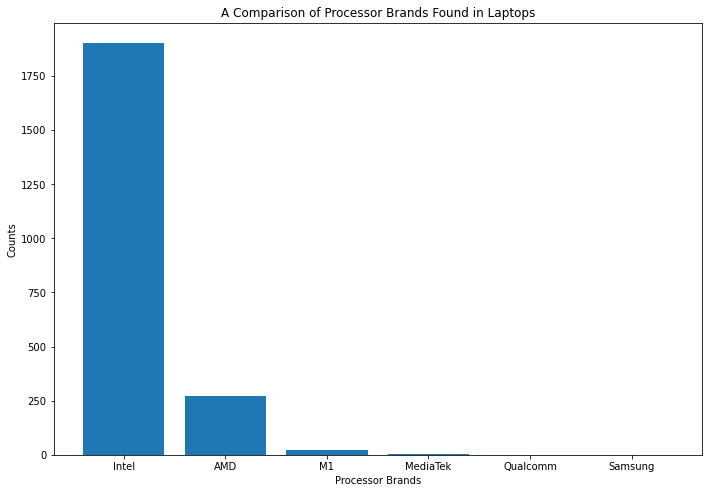

In [34]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_processors_grouped.processor,df_processors_grouped.counts)

plt.title("A Comparison of Processor Brands Found in Laptops")
plt.xlabel("Processor Brands")
plt.ylabel("Counts")
plt.show()

From this chart it is clearly seen that Intel rules the laptop market in terms of processors. With Intel processors being found in 1,900 different laptop. AMD processors are a far second, being found in 270 laptops. 

In [35]:
df_laptops.brand.value_counts()

Dell         451
Lenovo       448
Hp           416
Asus         412
Acer         161
Msi          106
Apple         49
Toshiba       48
Avita         18
Samsung       10
Microsoft      9
Lg             8
Razer          7
Mediacom       7
Vaio           5
Alienware      4
Infinix        4
Xiaomi         4
Vero           4
Realme         4
Nokia          4
Fujitsu        3
Redmibook      3
Smartron       3
Chuwi          3
Google         3
Huawei         2
Mi             2
Iball          1
Name: brand, dtype: int64

## Laptop Brand Pricing ##

In this section we take a look at how the different brands price their laptops. Different charts will be used in order to help with visualization.

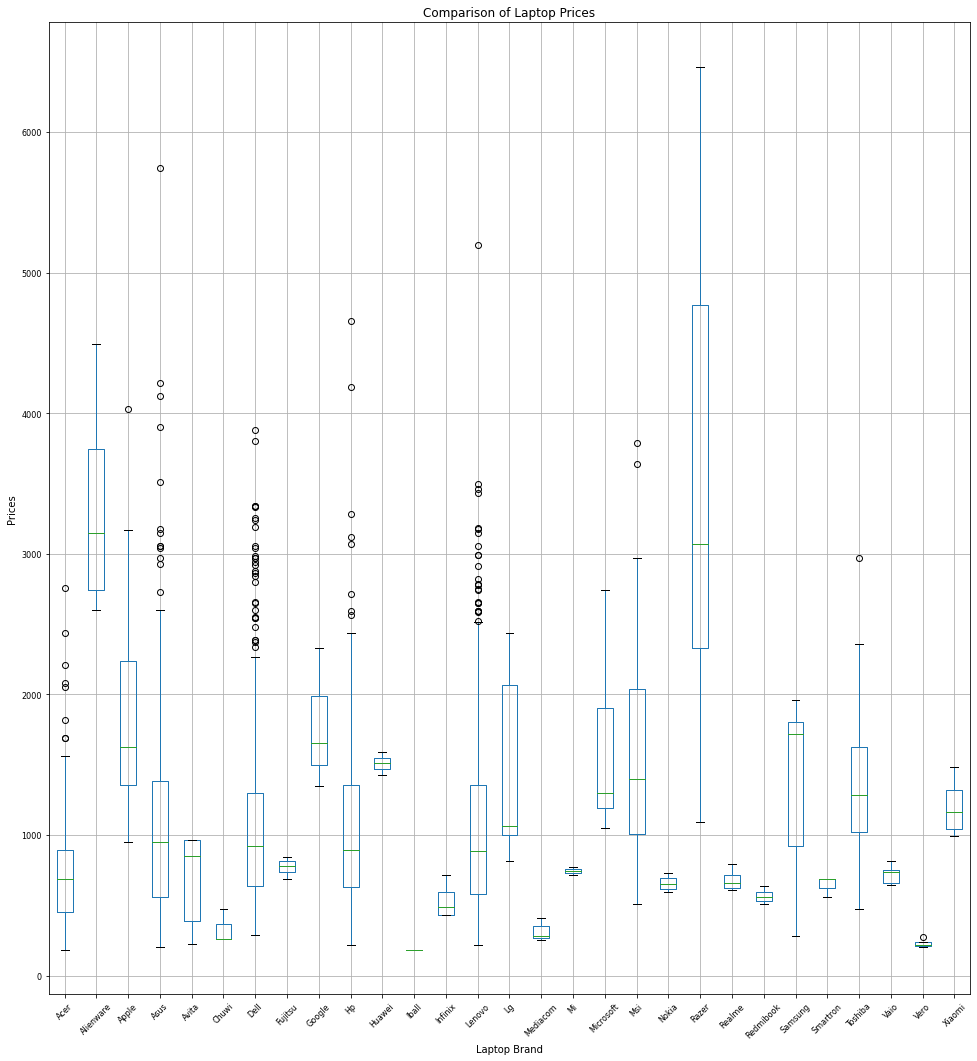

In [36]:
df_laptops.boxplot(column='price',by='brand',figsize=(16,18),fontsize=8,rot=45)
plt.title('Comparison of Laptop Prices')
plt.suptitle('')
plt.xlabel("Laptop Brand")
plt.ylabel("Prices")
plt.show()

From the chart, there are laptop brands which have multiple outliers. This could be attributed to some brands having laptops for different customer budgets. These brands may be selling "lower end" and "higher end" laptops in terms of specifications. While brands like Alienware and Razer are noticed to just sell higher priced laptops.

### Top 10 Most Expensive Laptops in the Dataset ##

In [37]:
df_laptops[['brand', 'model', 'price']].nlargest(10, 'price')

,brand,model,price
196,Razer,Blade Pro,6464.940
830,Razer,Blade Pro,5828.940
636,Asus,Zephyrus,5745.870
610,Lenovo,Thinkpad P51,5192.940
749,Hp,Zbook 17,4652.340
649,Alienware,Missing,4490.070
1066,Asus,ROG G701VO,4213.500
1136,Hp,ZBook 17,4186.364
238,Asus,ROG G703VI-E5062T,4123.400
677,Apple,MacBook,4029.870


### Top 10 Cheapest Laptops in the Dataset ###

In [38]:
df_laptops[['brand', 'model', 'price']].nsmallest(10, 'price')

,brand,model,price
683,Iball,CompBook,181.870
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,184.440
20,Asus,Vivobook E200HA,203.414
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),207.760
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),210.940
290,Acer,Chromebook C910-C2ST,210.940
791,Vero,K146 (N3350/4GB/32GB/W10),215.074
211,Lenovo,IdeaPad,220.870
1102,Acer,Chromebook 15,221.540
1268,Hp,Stream 11-Y000na,221.540


Now we will compare the averages of laptop prices across brands

In [39]:
df_avg_laptop_prices = pd.DataFrame(df_laptops.groupby('brand')['price'].mean().sort_values(ascending=False))
df_avg_laptop_prices.reset_index(inplace=True)
df_avg_laptop_prices

,brand,price
0,Razer,3546.911429
1,Alienware,3345.745000
2,Apple,1837.565718
3,Google,1778.326667
4,Microsoft,1561.400889
5,Msi,1555.234957
6,Huawei,1509.440000
7,Lg,1453.396250
8,Samsung,1399.113000
9,Toshiba,1343.881250


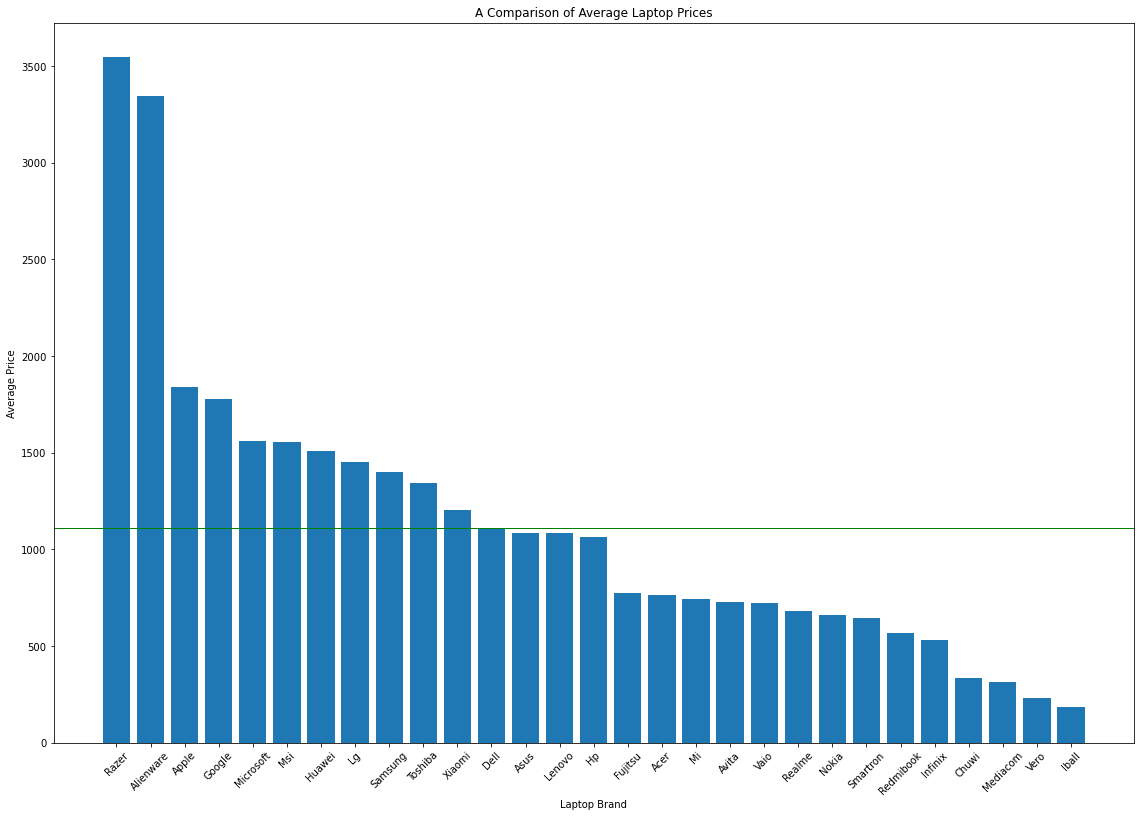

In [40]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_avg_laptop_prices.brand,df_avg_laptop_prices.price)

plt.axhline(y=df_laptops['price'].mean(),linewidth=1, color='g')

plt.title("A Comparison of Average Laptop Prices")
plt.xlabel("Laptop Brand")
plt.ylabel("Average Price")
plt.xticks(fontsize=10, rotation=45)
plt.show()

From the chart, the green horizontal line represents the average price of all laptops in the dataset. It is seen that 11 brands sell laptops above this threshold (Razer, Alienware, Apple, Google, Microsoft, Msi, Huawei, Lg, Samsung, Toshiba, Xiaomi).